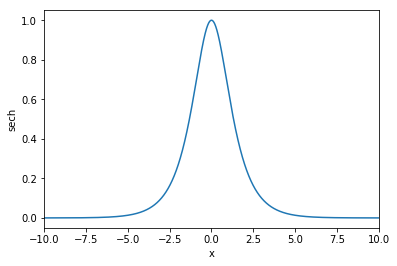

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

a = 1
def f(x):
    return 1/(np.cosh(a*x))

def ft_f(nu):
    return (np.pi/a)*(1/np.cosh((np.pi*nu)/2*a))


xmax = 10
dx = 0.001
xsech = np.arange(-xmax,xmax,dx)
ysech = f(xsech)

plt.plot(xsech, ysech)
plt.xlim(-xmax,xmax)
plt.xlabel("x")
plt.ylabel("sech")
plt.show()

In [12]:
from scipy.fftpack import fft, fftfreq

fftsech = fft(ysech)

print("Is the imaginary part close to zero:",np.isclose(np.imag(fftsech), 0).any())

Is the imaginary part close to zero: True


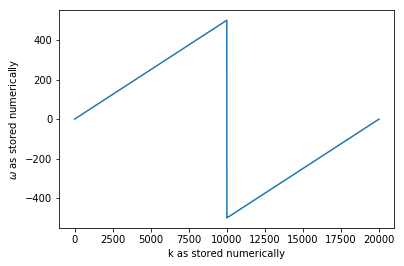

In [13]:
# the values of the frequencies

# defined manually
N = len(xsech)
dFreq = 2*np.pi/dx/N
freqMax = dFreq*N/2
freqsech = np.arange(-freqMax,freqMax,dFreq)

# with the fftfreq routine (note the order!)
freqsech2 = fftfreq(N, dx)
plt.plot(freqsech2)
plt.xlabel("k as stored numerically")
plt.ylabel(r"$\omega$ as stored numerically")
plt.show()

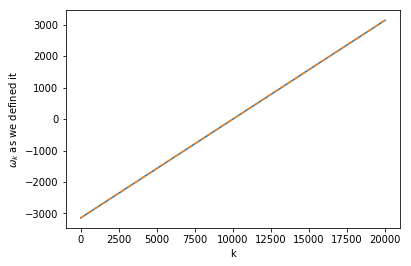

In [14]:
# you can shift the frequencies to be in the correct order like this:
from scipy.fftpack import fftshift, ifftshift

freqsech2 = fftshift(fftfreq(N, dx))

plt.plot(2*np.pi*freqsech2)          # we also need to include a factor of 2pi
plt.plot(freqsech, "--")             # compare with manual definition
plt.xlabel("k")
plt.ylabel(r"$\omega_k$ as we defined it")
plt.show()

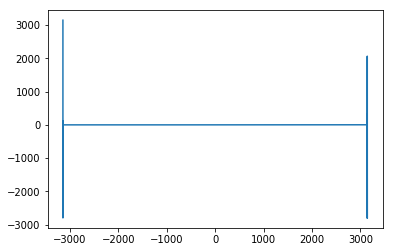

In [15]:
plt.plot(2*np.pi*freqsech2, np.real(fftsech))  
plt.show()

C:\Users\Dino the Dino\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in cosh
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Dino the Dino\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in cosh
  # Remove the CWD from sys.path while we load stuff.


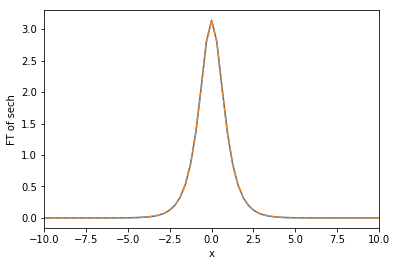

In [17]:
# and you can do the same shifts with the actual FFT

fftsech = fftshift( fft( ifftshift(ysech) ) )

# note that to recover the continuous FT you need to also multiply by the time step:

ftNumerical = np.real(dx*fftsech)

plt.plot(freqsech, ftNumerical)
plt.plot(freqsech, ft_f(freqsech), "--")
plt.xlim(-10,10)
plt.xlabel("x")
plt.ylabel("FT of sech")
plt.show()

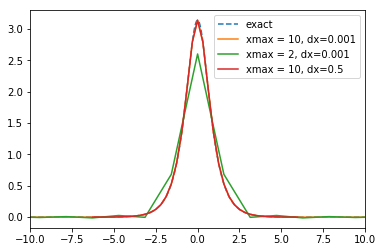

In [26]:
# How does our approximation depend on dx or N?
# How does our approximation depend on xmax?

def myFFT(xmax, dx):
    
    xsech = np.arange(-xmax,xmax,dx)
    ysech = f(xsech)
    
    N = len(xsech)
    dFreq = 2*np.pi/dx/N
    freqMax = dFreq*N/2
    freqsech = np.arange(-freqMax,freqMax,dFreq)

    fftsech = fftshift( fft( ifftshift(ysech) ) )

    ftNumerical = np.real(dx*fftsech)

    return freqsech, ftNumerical

previous = myFFT(10,0.001)
smallerXmax = myFFT(2,0.001)       # worse resolution (smaller dFreq)
smallerN = myFFT(10,0.5)           # smaller frequency range (freqMax)

nuForPlot = np.arange(-10,10,0.001)
plt.plot(nuForPlot, ft_f(nuForPlot), "--", label = "exact")
plt.plot(previous[0], previous[1], label = "xmax = 10, dx=0.001")
plt.plot(smallerXmax[0], smallerXmax[1], label = "xmax = 2, dx=0.001")
plt.plot(smallerN[0], smallerN[1], label = "xmax = 10, dx=0.5")
plt.legend(loc = "upper right")
plt.xlim(-10,10)
plt.show()

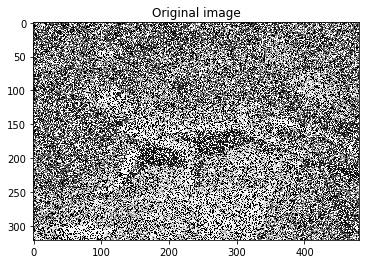

In [51]:
import numpy as np
import matplotlib.pyplot as plt

im = plt.imread('lizard_noisy.png').astype(float)

plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original image')
plt.show()

Text(0.5, 1.0, 'Fourier transform')

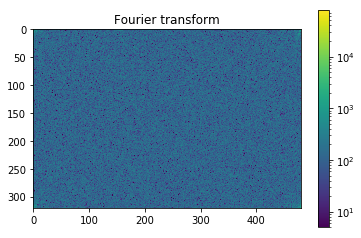

In [52]:
from scipy import fftpack
im_fft = fftpack.fft2(im)

# Show the results

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')

Text(0.5, 1.0, 'Filtered Spectrum')

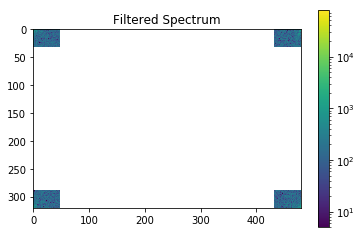

In [56]:
# In the lines following, we'll make a copy of the original spectrum and
# truncate coefficients.

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = im_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c, = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')

Text(0.5, 1.0, 'Reconstructed Image')

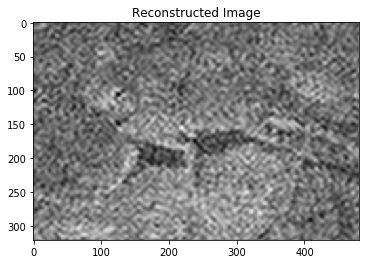

In [57]:
# Reconstruct the denoised image from the filtered spectrum, keep only the
# real part for display.
im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')

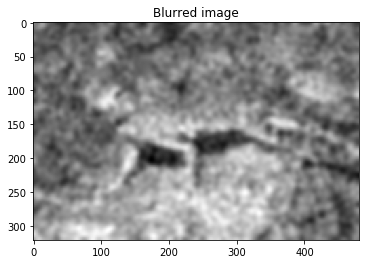

In [58]:
from scipy import ndimage
im_blur = ndimage.gaussian_filter(im, 4)

plt.figure()
plt.imshow(im_blur, plt.cm.gray)
plt.title('Blurred image')

plt.show()